In [13]:
import numpy as np 
import pandas as pd 
import os
import math
import operator
from pylab import *
import matplotlib
import matplotlib.pyplot as plt
import sklearn.neighbors as sn
# import seaborn as sns; sns.set()
from statistics import stdev,mean
import scipy.stats as ss
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

#### KNN Classifier

In [14]:
def KNN_classifier(k,inst, dataset,Class,distmeasure):
    if distmeasure == 'euclidean':
        dist = []
        for x in range(0,dataset.shape[0]):
            inst2 = list(dataset[x][:])
            l = len(inst)
            distance = 0
            for i in range(0,l):
                distance += pow((float(inst[i]) - float(inst2[i])), 2)
            dist.append((Class[x],math.sqrt(distance)))
    
    elif distmeasure == 'manhattan':
        dist = []
        for x in range(0,dataset.shape[0]):
            inst2 = list(dataset[x][:])
            l = len(inst)
            distance = 0
            for i in range(0,l):
                distance += abs(inst[i]-inst2[i])
            dist.append((Class[x],distance))
    
    elif distmeasure == 'chebychev':
        dist = []
        for x in range(0,dataset.shape[0]):
            inst2 = list(dataset[x][:])
            l = len(list1)
            distance = 0
            for i in range(0,l):
                distance = max(distance,abs(list1[i]-list2[i]))
            dist.append((Class[x],distance))
            
    elif distmeasure == 'cosine':
        dist = []
        for x in range(0,dataset.shape[0]):
            inst2 = list(dataset[x][:])
            dist.append((Class[x],cosine_measure(inst,inst2)))
            
    
    dist.sort(key=operator.itemgetter(1))
    #print(dist)
    uniq = {}
    count = 0
    for y in dist:
        count += 1
        if y[0] not in uniq.keys():
            uniq[y[0]] = 1
        else:
            uniq[y[0]]+=1
        if count == k:
            break
    
    maxim = 0
    for key in uniq.keys():
        if maxim < uniq[key]:
            maxim = uniq[key]
            Class = key
    
    return Class
        

In [15]:
def printvals(train_data,train_class,val_data,val_class,measure,K):
    pred = []
    Mean = np.mean(train_data,0)
    Std = np.std(train_data,0)
    temp = []
    for i in range(0,train_data.shape[0]):
        inst = train_data.iloc[i,:].values
        inst1 = (inst-Mean)/(Std)
        temp.append(inst1)
    temp = np.array(temp)
        
    #print("hello"," ",type(train_dataS))
    for i in range(0,val_data.shape[0]):
        inst = val_data.iloc[i,:].values
        inst2 = (inst-Mean)/(Std)
        pred.append(KNN_classifier(K,list(inst2), temp,train_class ,measure))

    print("F1-score",f1_score(val_class,pred, average = 'micro'))
    print("precision",precision_score(val_class,pred, average = 'micro'))
    print("Accuracy",accuracy_score(val_class,pred))
    print("Recall",recall_score(val_class,pred, average = 'micro'))
    return accuracy_score(val_class,pred)


In [16]:
def printvals_inbuilt(train_data,train_class,val_data,val_class,measure,K):
    neigh = sn.KNeighborsClassifier(n_neighbors = K, weights = 'uniform', algorithm = 'auto', leaf_size = 30, p = 2, metric = 'minkowski')
    train_dataS1=scale(train_data)
    neigh.fit(train_dataS1,train_class)
    val_dataS=scale(val_data)
    pred = neigh.predict(val_dataS)
    print("F1-score",f1_score(val_class,pred, average = 'micro'))
    print("precision",precision_score(val_class,pred, average = 'micro'))
    print("Accuracy",accuracy_score(val_class,pred))
    print("Recall",recall_score(val_class,pred, average = 'micro'))


In [17]:
iris = pd.read_csv("./Iris/Iris.csv")
robo1 = pd.read_csv("./RobotDataset/Robot1.csv")
robo2 = pd.read_csv("./RobotDataset/Robot2.csv")

### PART - 1

In [18]:
y_iris = iris.Class.values
X_iris = iris.iloc[:,:].drop('Class', axis = 1)
X_iris_train,X_iris_val,y_iris_train,y_iris_val=train_test_split(X_iris,y_iris,test_size=0.2,stratify=y_iris,random_state=42)
printvals(X_iris_train,y_iris_train,X_iris_val,y_iris_val,'euclidean',20)
print("\ninbult KNN classifier")
printvals_inbuilt(X_iris_train,y_iris_train,X_iris_val,y_iris_val,'euclidean',20)


F1-score 1.0
precision 1.0
Accuracy 1.0
Recall 1.0

inbult KNN classifier
F1-score 1.0
precision 1.0
Accuracy 1.0
Recall 1.0


In [19]:
y_robo1 = robo1.Class.values
X_robo1 = robo1.iloc[:,:].drop('Class', axis = 1)
X_robo1 = X_robo1.drop('Id', axis = 1)
print(y_robo1.shape)
print(X_robo1.shape)
X_robo1_train,X_robo1_val,y_robo1_train,y_robo1_val=train_test_split(X_robo1,y_robo1,test_size=0.2,stratify=y_robo1,random_state=42)

printvals(X_robo1_train,y_robo1_train,X_robo1_val,y_robo1_val,'euclidean',10)
print("\ninbult KNN classifier")
printvals_inbuilt(X_robo1_train,y_robo1_train,X_robo1_val,y_robo1_val,'euclidean',20)


(124,)
(124, 6)
F1-score 0.8000000000000002
precision 0.8
Accuracy 0.8
Recall 0.8

inbult KNN classifier
F1-score 0.8000000000000002
precision 0.8
Accuracy 0.8
Recall 0.8


/home/animi/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/animi/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  """


In [8]:
y_robo2 = robo2.Class.values
X_robo2 = robo2.iloc[:,:].drop('Class', axis = 1)
X_robo2 = X_robo2.drop('Id', axis = 1)
X_robo2_train,X_robo2_val,y_robo2_train,y_robo2_val=train_test_split(X_robo2,y_robo2,test_size=0.2,stratify=y_robo2,random_state=42)

printvals(X_robo2_train,y_robo2_train,X_robo2_val,y_robo2_val,'euclidean',10)
print("\ninbult KNN classifier")
printvals_inbuilt(X_robo2_train,y_robo2_train,X_robo2_val,y_robo2_val,'euclidean',10)

F1-score 0.92
precision 0.92
Accuracy 0.92
Recall 0.92

inbult KNN classifier
F1-score 0.92
precision 0.92
Accuracy 0.92
Recall 0.92


/home/animi/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/animi/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  """


### PART - 2

F1-score 1.0
precision 1.0
Accuracy 1.0
Recall 1.0
F1-score 1.0
precision 1.0
Accuracy 1.0
Recall 1.0
F1-score 1.0
precision 1.0
Accuracy 1.0
Recall 1.0
F1-score 1.0
precision 1.0
Accuracy 1.0
Recall 1.0
F1-score 1.0
precision 1.0
Accuracy 1.0
Recall 1.0
F1-score 1.0
precision 1.0
Accuracy 1.0
Recall 1.0
F1-score 1.0
precision 1.0
Accuracy 1.0
Recall 1.0
F1-score 1.0
precision 1.0
Accuracy 1.0
Recall 1.0
F1-score 1.0
precision 1.0
Accuracy 1.0
Recall 1.0
F1-score 1.0
precision 1.0
Accuracy 1.0
Recall 1.0
F1-score 1.0
precision 1.0
Accuracy 1.0
Recall 1.0
F1-score 1.0
precision 1.0
Accuracy 1.0
Recall 1.0
F1-score 1.0
precision 1.0
Accuracy 1.0
Recall 1.0
F1-score 1.0
precision 1.0
Accuracy 1.0
Recall 1.0
F1-score 1.0
precision 1.0
Accuracy 1.0
Recall 1.0
F1-score 1.0
precision 1.0
Accuracy 1.0
Recall 1.0
F1-score 1.0
precision 1.0
Accuracy 1.0
Recall 1.0
F1-score 1.0
precision 1.0
Accuracy 1.0
Recall 1.0
F1-score 1.0
precision 1.0
Accuracy 1.0
Recall 1.0
F1-score 1.0
precision 1.0
Accu

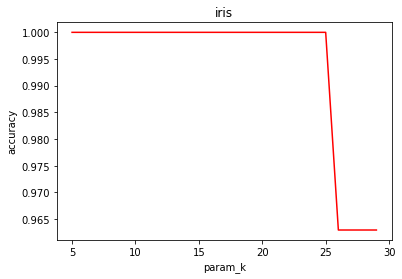

In [20]:
accuracy = []
param_k = []
for k in range(5,30):
    param_k.append(k)
    accuracy.append(printvals(X_iris_train,y_iris_train,X_iris_val,y_iris_val,'euclidean',k))

figure()
plot(param_k, accuracy, 'r')
xlabel('param_k')
ylabel('accuracy')
title('iris')
show()

F1-score 0.72
precision 0.72
Accuracy 0.72
Recall 0.72
F1-score 0.64
precision 0.64
Accuracy 0.64
Recall 0.64
F1-score 0.68
precision 0.68
Accuracy 0.68
Recall 0.68
F1-score 0.68
precision 0.68
Accuracy 0.68
Recall 0.68
F1-score 0.72
precision 0.72
Accuracy 0.72
Recall 0.72
F1-score 0.8000000000000002
precision 0.8
Accuracy 0.8
Recall 0.8
F1-score 0.8399999999999999
precision 0.84
Accuracy 0.84
Recall 0.84
F1-score 0.8000000000000002
precision 0.8
Accuracy 0.8
Recall 0.8
F1-score 0.76
precision 0.76
Accuracy 0.76
Recall 0.76
F1-score 0.72
precision 0.72
Accuracy 0.72
Recall 0.72
F1-score 0.76
precision 0.76
Accuracy 0.76
Recall 0.76
F1-score 0.76
precision 0.76
Accuracy 0.76
Recall 0.76
F1-score 0.8000000000000002
precision 0.8
Accuracy 0.8
Recall 0.8
F1-score 0.8000000000000002
precision 0.8
Accuracy 0.8
Recall 0.8
F1-score 0.76
precision 0.76
Accuracy 0.76
Recall 0.76
F1-score 0.8000000000000002
precision 0.8
Accuracy 0.8
Recall 0.8
F1-score 0.8000000000000002
precision 0.8
Accuracy 

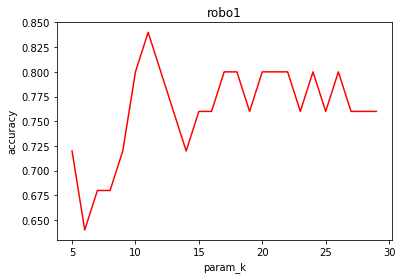

In [21]:
accuracy = []
param_k = []
for k in range(5,30):
    param_k.append(k)
    accuracy.append(printvals(X_robo1_train,y_robo1_train,X_robo1_val,y_robo1_val,'euclidean',k))

figure()
plot(param_k, accuracy, 'r')
xlabel('param_k')
ylabel('accuracy')
title('robo1')
show()

F1-score 0.92
precision 0.92
Accuracy 0.92
Recall 0.92
F1-score 0.8399999999999999
precision 0.84
Accuracy 0.84
Recall 0.84
F1-score 0.88
precision 0.88
Accuracy 0.88
Recall 0.88
F1-score 0.88
precision 0.88
Accuracy 0.88
Recall 0.88
F1-score 0.96
precision 0.96
Accuracy 0.96
Recall 0.96
F1-score 0.92
precision 0.92
Accuracy 0.92
Recall 0.92
F1-score 0.92
precision 0.92
Accuracy 0.92
Recall 0.92
F1-score 0.92
precision 0.92
Accuracy 0.92
Recall 0.92
F1-score 0.92
precision 0.92
Accuracy 0.92
Recall 0.92
F1-score 0.96
precision 0.96
Accuracy 0.96
Recall 0.96
F1-score 0.96
precision 0.96
Accuracy 0.96
Recall 0.96
F1-score 1.0
precision 1.0
Accuracy 1.0
Recall 1.0
F1-score 1.0
precision 1.0
Accuracy 1.0
Recall 1.0
F1-score 1.0
precision 1.0
Accuracy 1.0
Recall 1.0
F1-score 1.0
precision 1.0
Accuracy 1.0
Recall 1.0
F1-score 1.0
precision 1.0
Accuracy 1.0
Recall 1.0
F1-score 1.0
precision 1.0
Accuracy 1.0
Recall 1.0
F1-score 1.0
precision 1.0
Accuracy 1.0
Recall 1.0
F1-score 0.96
precision 

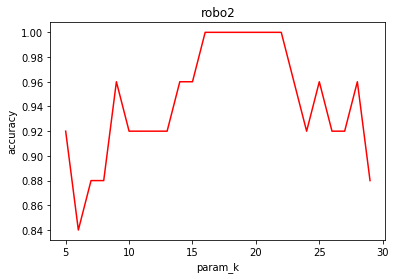

In [22]:
accuracy = []
param_k = []
for k in range(5,30):
    param_k.append(k)
    accuracy.append(printvals(X_robo2_train,y_robo2_train,X_robo2_val,y_robo2_val,'euclidean',k))

figure()
plot(param_k, accuracy, 'r')
xlabel('param_k')
ylabel('accuracy')
title('robo2')
show()